- [Dataset](https://www.kaggle.com/c/titanic)

- Please include documentation at [Overleaf](https://www.overleaf.com/project/5ffbf8c398e5780f308630ef) as you make progress


### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import math
#!pip install datawig
import datawig

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
to_exclude = [i+1 for i in range(len(data['Age'])) if math.isnan(data['Age'][i])]
to_keep = [i+1 for i in range(len(data['Age'])) if not math.isnan(data['Age'][i])]

df_train = pd.read_csv("train.csv", skiprows = to_exclude)
df_test = pd.read_csv("train.csv", skiprows = to_keep)

to_keep_t = [i+1 for i in range(len(test['Age'])) if not math.isnan(test['Age'][i])]

df_test_t = pd.read_csv("test.csv", skiprows = to_keep_t)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp','Parch'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original L with predictions
imputed = imputer.predict(df_test)
test_imputed = imputer.predict(df_test_t)

cnt=0
for i in range(len(df['Age'])):
    
    if math.isnan(df['Age'][i]):
        df['Age'][i] = imputed['Age_imputed'][cnt]
        cnt+=1

cnt =  0
for j in range(len(test['Age'])):
    if math.isnan(test['Age'][j]):
        test['Age'][j] = test_imputed['Age_imputed'][cnt]
        cnt+=1

2021-03-20 23:16:01,363 [INFO]  
========== start: fit model
2021-03-20 23:16:01,364 [WARNING]  Already bound, ignoring bind()
2021-03-20 23:16:01,393 [INFO]  Epoch[0] Batch [0-21]	Speed: 14805.60 samples/sec	cross-entropy=16.065413	Age-accuracy=0.000000
2021-03-20 23:16:01,413 [INFO]  Epoch[0] Train-cross-entropy=14.116191
2021-03-20 23:16:01,414 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-03-20 23:16:01,415 [INFO]  Epoch[0] Time cost=0.047
2021-03-20 23:16:01,423 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-03-20 23:16:01,429 [INFO]  Epoch[0] Validation-cross-entropy=15.324096
2021-03-20 23:16:01,430 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-03-20 23:16:01,463 [INFO]  Epoch[1] Batch [0-21]	Speed: 11363.65 samples/sec	cross-entropy=13.641666	Age-accuracy=0.000000
2021-03-20 23:16:01,487 [INFO]  Epoch[1] Train-cross-entropy=12.505892
2021-03-20 23:16:01,488 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-03-20 23:16:01,489 [INFO]  Epoch[1] Tim

In [4]:
df['Sex'],unique= pd.factorize(df.Sex)
df['Embarked'],uniqueembark = pd.factorize(df.Embarked)
test['Sex'],unique_t = pd.factorize(test.Sex)
test['Embarked'],uniqueembark_t = pd.factorize(test.Embarked)

In [5]:
to_exclude1 = [i+1 for i in range(len(data['Cabin'])) if not isinstance(data['Cabin'][i],str)]
to_keep1 = [i+1 for i in range(len(data['Cabin'])) if isinstance(data['Cabin'][i],str)]

test1 = pd.read_csv("test.csv")

df_train1 = pd.read_csv("train.csv", skiprows = to_exclude1)
df_test1 = pd.read_csv("train.csv", skiprows = to_keep1)

to_keep_t1 = [i+1 for i in range(len(test1['Cabin'])) if isinstance(test1['Cabin'][i],str)]

df_test1_t = pd.read_csv("test.csv", skiprows = to_keep_t1)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','Fare','Embarked'], # column(s) containing information about the column we want to impute
    output_column= 'Cabin', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train1, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test1)
test_imputed = imputer.predict(df_test1_t)

cnt=0
for i in range(len(df['Cabin'])):
    
    if not isinstance(data['Cabin'][i],str):
        df['Cabin'][i] = imputed['Cabin_imputed'][cnt]
        cnt+=1
        
cnt =  0
for j in range(len(test['Cabin'])):
    if not isinstance(test['Cabin'][j],str):
        test['Cabin'][j] = test_imputed['Cabin_imputed'][cnt]
        cnt+=1

/Users/xiaoyangpan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/xiaoyangpan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoyangpan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [6]:
df['Cabin'],uniquecabin = pd.factorize(df.Cabin)
test['Cabin'],uniquecabin_t = pd.factorize(test.Cabin)

In [7]:
f= pd.read_csv("GroundTruth.csv")
f = f.drop(index = 152)
test = test.drop(index=152)

#df=  df.drop(['Name','Ticket'],axis =1)
#test = test.drop(['Name','Ticket'],axis =1)
df=  df.drop(['Name','Ticket','PassengerId'],axis =1)
test = test.drop(['Name','Ticket','PassengerId'],axis =1)

In [8]:
frop


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,1,38.000000,1,0,71.2833,1,1
2,1,3,1,26.000000,0,0,7.9250,0,0
3,1,1,1,35.000000,1,0,53.1000,2,0
4,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,6,0
887,1,1,1,19.000000,0,0,30.0000,145,0
888,0,3,1,26.043645,1,2,23.4500,0,0
889,1,1,0,26.000000,0,0,30.0000,146,1


In [9]:

#X = np.concatenate((np.reshape(X1,(len(X1),1)),X2),axis=1)
X = df.iloc[:,1:].values
#Y = df.iloc[:,1].values
Y = df.iloc[:,0].values
xt = test.iloc[:,:].values
yt = f.iloc[:,1].values

              precision    recall  f1-score   support

           0       0.96      0.66      0.78       377
           1       0.18      0.72      0.29        40

    accuracy                           0.66       417
   macro avg       0.57      0.69      0.54       417
weighted avg       0.88      0.66      0.73       417

0.6642685851318945


<AxesSubplot:>

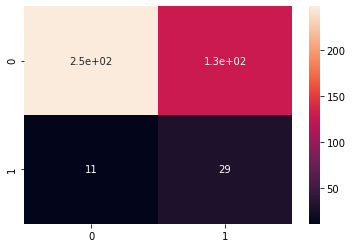

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Model = LogisticRegression()
Model.fit(X,Y)
y_pred = Model.predict(xt)
accuracy_score = accuracy_score(y_pred,yt)
print(classification_report(y_pred,yt))
print(accuracy_score)

import seaborn as sns
sns.heatmap(confusion_matrix(y_pred,yt),annot = True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc  = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

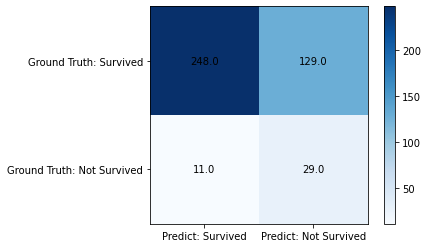

In [28]:
fig, ax = plt.subplots()
confusion = confusion_matrix(y_pred,yt)

im = ax.imshow(confusion, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])

for (r, c), val in np.ndenumerate(confusion):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')

In [12]:
from minisom import MiniSom

som = MiniSom(x = 8,y=8, input_len = 8,sigma = 1.0,learning_rate = 0.05)
som.random_weights_init(X)
som.train_random(data = X,num_iteration = 100)

In [29]:
y_pred.shape

(417,)

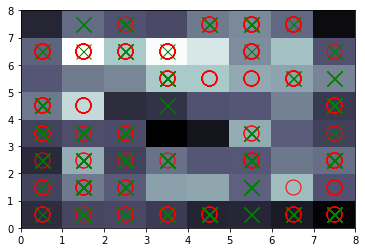

In [14]:
from pylab import plot,show, pcolor
import pylab
marker = ['x','o']
color = ['g','r']
pylab.bone()
pcolor(som.distance_map().T)
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,marker[Y[i]],markeredgecolor = color[Y[i]],markerfacecolor =  'None',
         markersize=15,markeredgewidth = 1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import math
K = round(math.sqrt(df.shape[0]))
if(K%2==0):
    K=K+1

In [25]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = K,p=1)
knn.fit(X,Y)
y_pred = knn.predict(xt)
accuracy_score = accuracy_score(y_pred,yt)
print(classification_report(y_pred,yt))
print(accuracy_score)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       305
           1       0.56      0.79      0.65       112

    accuracy                           0.77       417
   macro avg       0.73      0.78      0.74       417
weighted avg       0.81      0.77      0.78       417

0.7745803357314148


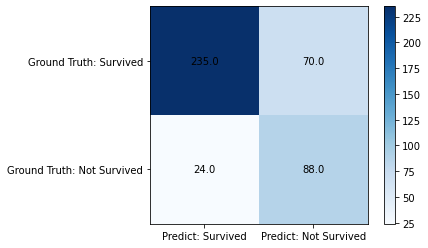

In [18]:
a = confusion_matrix(y_pred,yt)

In [19]:
confusion = pd.DataFrame(confusion_matrix(y_pred,yt),
     index=['Survived', 'Not Survived'],
     columns=['Predict Survived', 'Predict Not Survived'])

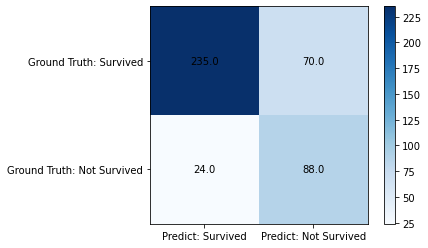

In [20]:
import matplotlib.pyplot as plt 
import matplotlib

fig, ax = plt.subplots()
confusion = confusion_matrix(y_pred,yt)

im = ax.imshow(confusion, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(yticks=[0, 1], 
       xticks=[0, 1], 
       yticklabels=['Ground Truth: Survived', 'Ground Truth: Not Survived'], 
       xticklabels=['Predict: Survived', 'Predict: Not Survived'])

for (r, c), val in np.ndenumerate(confusion):
    ax.text(c, r, '{:0.1f}'.format(val), ha='center', va='center')
